# PRIVACY - EXPLORATORY DATA ANALYSIS (EDA)

### PROBLEM STATEMENT
As part of a new initiative, the State of Massachusetts is building a model to predict which residents currently are not protected by a health care plan. The end goal is to reach out to these individuals to inform them of no-cost plans provided by the State. To better understand which residents are most at risk of being left unprotected, the State wants to create a machine learning model based on the U.S. Census data from last year. The State has been granted access to the raw survey results, including personally identifiable information (PII) such as names and addresses.

How can Massachusetts build a model with this data in a way that protects the privacy of the individuals whose data is present in the training set?


### MILESTONE 2

Literature Review and Preliminary Exploratory Data Analysis

Submit a 2 - 3 page revised project statement and EDA (can be created using Latex, word processing software, etc.) and an accompanying Jupyter notebook (that was used to create the visuals). Your 2 - 3 page submission should include:

A description of the data: what type of data are you dealing with? What methods have you used to explore the data (initial explorations, data cleaning and reconciliation, etc)?
Visualizations and captions that summarize the noteworthy findings of the EDA
A project question based on the insights you gained through EDA.
A baseline model or clear plan for its implementation
Please, no zip files! Thanks, everyone.

### Final Deliverable Expectations:

For the final deliverable, although it isn’t required, I would encourage you to think about the broader picture in terms of ethical implications and use cases. A slide on this would suffice. And be reminded that the most important thing for the final deliverable is the justification of your process. Why did you design your model the way you did? How did you solve any issues with the data and why was that method the best solution? This is the best way to demonstrate the knowledge and skills you’ve gained. But keep it concise nonetheless. 14/15

#### Import Libraries

In [2]:
#!git clone https://github.com/nathann3/109b_final_project.git

In [3]:
#!pip install opendp-smartnoise

In [4]:
#!pip install diffprivlib

# DATA EXPLORATION

In [489]:
import matplotlib.pyplot as plt
import numpy as np
import opendp.smartnoise.core as sn
import os
import pandas as pd
import seaborn as sns
import scipy.stats as ss

from datetime import datetime
from IPython.utils.text import columnize
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


%matplotlib inline

# Display Max Rows
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Set Style
sns.set_style("whitegrid")

#### Read & Store Data

In [502]:
fp = 'data/csv_pma/psam_p25.csv'
df = pd.read_csv(fp)
df.names      = 'PSAM P25 Dataset'

# check info
df.info()

# check shape
print(f"\nShape:\n{df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70579 entries, 0 to 70578
Columns: 288 entries, RT to PWGTP80
dtypes: float64(85), int64(199), object(4)
memory usage: 155.1+ MB

Shape:
(70579, 288)


#### Display 10 Random Rows

In [503]:
df.sample(10, random_state=109)

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HIMRKS,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTRNS,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELSHIPP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKWN,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHICOVP,FHIMRKSP,FHINS1P,FHINS2P,FHINS3C,FHINS3P,FHINS4C,FHINS4P,FHINS5C,FHINS5P,FHINS6P,FHINS7P,FHISP,FINDP,FINTP,FJWDP,FJWMNP,FJWRIP,FJWTRNSP,FLANP,FLANXP,FMARP,FMARHDP,FMARHMP,FMARHTP,FMARHWP,FMARHYP,FMIGP,FMIGSP,FMILPP,FMILSP,FOCCP,FOIP,FPAP,FPERNP,FPINCP,FPOBP,FPOWSP,FPRIVCOVP,FPUBCOVP,FRACP,FRELSHIPP,FRETP,FSCHGP,FSCHLP,FSCHP,FSEMP,FSEXP,FSSIP,FSSP,FWAGP,FWKHP,FWKLP,FWKWNP,FWRKP,FYOEP,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
42817,P,2019HU0814318,1,4,100,1,25,1010145,13,11,1,NaN,NaN,2.0,2,2,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0,1,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2.0,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,3.0,8.0,8.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,88,32,NaN,2,NaN,3.0,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,NaN,NaN,NaN,NaN,25,379.0,NaN,NaN,1,2,3,1,1,1,0,0,0,0,1,0,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12,13,24,6,14,15,4,15,12,4,12,16,14,2,24,27,23,23,4,14,4,18,15,11,24,25,11,2,4,16,26,4,21,12,13,15,12,12,13,5,15,11,25,5,13,13,3,14,12,4,13,15,13,2,22,20,27,27,4,15,3,23,11,12,25,20,12,4,5,12,20,3,24,14,13,14,14,16,11
48519,P,2019HU0936901,1,1,701,1,25,1010145,34,24,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,0,2,2,2,1,2,2,2,0.0,5.0,NaN,10.0,2.0,5,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,20,0.0,1.0,NaN,18.0,0.0,2,0.0,0.0,8900.0,35.0,1.0,45.0,1.0,NaN,2,261,510,NaN,2,NaN,NaN,1.0,NaN,NaN,1,3,8680.0,60.0,20.0,NaN,NaN,NaN,6.0,722Z,1,NaN,0.0,4110.0,1.0,8900.0,8900.0,25,51.0,3300.0,25.0,2,1,4,9,68,38,0,0,1,0,2,0,1,0,0.0,NaN,NaN,NaN,NaN,353031,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0.0,0,NaN,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,57,33,50,36,9,30,10,70,35,10,9,37,31,41,40,32,62,33,57,9,45,36,68,30,10,38,11,58,32,11,12,26,32,34,30,38,57,43,59,12,58,28,63,38,9,33,11,59,32,9,8,38,36,40,41,32,51,31,61,10,54,40,73,29,11,34,11,53,31,10,12,30,33,30,36,42,53,30,54
36658,P,2019HU0674533,1,1,304,1,25,1010145,57,89,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,0,2,2,1,1,2,2,2,0.0,NaN,NaN,NaN,2.0,2,2.0,2.0,2.0,2.0,1949.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,2.0,2.0,3.0,0.0,0.0,20,11900.0,1.0,NaN,16.0,0.0,2,0.0,13600.0,0.0,NaN,3.0,NaN,2.0,NaN,4,999,999,NaN,2,NaN,NaN,6.0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,390.0,25.0,3.0,

In [504]:
keepCols = ['PUMA', 'PWGTP', 'AGEP', 'CIT', 'LANX', 'SCHL', 'SEX',
            'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'DREM', 'GCL',
            'COW', 'MAR','ESR','MIG', 'DIS','RAC1P', 'HICOV']

# subset to only features of interest
df = df[keepCols]

# look for null values
null_cols =  pd.DataFrame(df.isnull().sum(), columns=["nulls"])
null_cols["percent_null"] = null_cols["nulls"]/len(df) * 100
null_cols = null_cols.sort_values(by="nulls", ascending=False)
display(null_cols)

,nulls,percent_null
COW,24815,35.159183
GCL,24261,34.374247
ESR,10684,15.137647
DOUT,9925,14.062256
LANX,3083,4.368155
DDRS,3083,4.368155
DPHY,3083,4.368155
DREM,3083,4.368155
SCHL,1818,2.575837
MIG,576,0.816107


In [505]:
df.describe()

,PUMA,PWGTP,AGEP,CIT,LANX,SCHL,SEX,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,GCL,COW,MAR,ESR,MIG,DIS,RAC1P,HICOV
count,70579.000000,70579.000000,70579.000000,70579.000000,67496.000000,68761.000000,70579.000000,67496.000000,70579.000000,70579.000000,60654.000000,67496.000000,67496.000000,46318.000000,45764.000000,70579.000000,59895.000000,70003.000000,70579.000000,70579.000000,70579.000000
mean,2109.538928,97.656569,42.366001,1.539962,1.797395,17.105525,1.516868,1.963035,1.963403,1.979937,1.932206,1.931448,1.939330,1.974243,2.040753,3.014707,2.831739,1.243461,1.867949,1.862197,1.024285
std,1654.754685,75.062756,23.460462,1.234522,0.401943,5.569632,0.499719,0.188678,0.187772,0.140216,0.251395,0.252693,0.238726,0.158410,1.768593,1.872561,2.367602,0.647400,0.338548,2.113031,0.153933
min,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,504.000000,56.000000,22.000000,1.000000,2.000000,16.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,1900.000000,78.000000,43.000000,1.000000,2.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,3601.000000,113.000000,61.000000,1.000000,2.000000,21.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,6.000000,1.000000,2.000000,1.000000,1.000000
max,4903.000000,1146.000000,94.000000,5.000000,2.000000,24.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,5.000000,6.000000,3.000000,2.000000,9.000000,2.000000


# Data Pre-processing

In [506]:
binary_dict = {'1':'1', '2':'0'}

In [507]:
df['HICOV'] = df.HICOV.map(binary_dict)


## Intuition 

We need to protect the survey data from potential adversarial attackers, trying to get information about survey participants. In the example below, we illustrate how easy it would be to locate individuals just from their zipcodes. 

Differential privacy mechanisms such as Laplace are designed to address such queries with suficient noise to mask the participation of any individual.

In [509]:
#Converting to binary classifications
#df['HICOV']= df['HICOV'].apply(lambda x: 1 if x==1 else 0)

In [510]:
#visually_impaired_black_female
df[(df['DEAR']==1) & (df['SEX']==2) & (df['RAC1P']==2)]

,PUMA,PWGTP,AGEP,CIT,LANX,SCHL,SEX,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,GCL,COW,MAR,ESR,MIG,DIS,RAC1P,HICOV
126,4500,79,94,1,1.0,16.0,2,1.0,1,1,1.0,1.0,2.0,2.0,NaN,1,6.0,1.0,1,2,0
567,4303,28,94,1,1.0,16.0,2,1.0,1,1,1.0,1.0,2.0,2.0,NaN,1,6.0,1.0,1,2,0
840,2400,50,24,1,2.0,16.0,2,2.0,1,2,1.0,2.0,1.0,NaN,NaN,5,6.0,1.0,1,2,0
1042,3306,31,79,2,1.0,11.0,2,1.0,1,1,1.0,1.0,1.0,2.0,NaN,2,6.0,1.0,1,2,0
1368,703,40,75,1,2.0,12.0,2,1.0,1,2,1.0,1.0,1.0,2.0,NaN,5,6.0,1.0,1,2,0
1826,3304,10,75,1,2.0,12.0,2,1.0,1,2,1.0,1.0,1.0,2.0,NaN,5,6.0,1.0,1,2,0
1911,3302,56,79,2,1.0,11.0,2,1.0,1,1,1.0,1.0,1.0,2.0,NaN,2,6.0,1.0,1,2,0
2611,4000,63,89,1,2.0,16.0,2,1.0,1,2,1.0,1.0,2.0,2.0,NaN,2,6.0,3.0,1,2,0
3035,4000,23,83,1,1.0,1.0,2,1.0,1,1,1.0,1.0,1.0,2.0,NaN,4,6.0,3.0,1,2,0
3260,1300,42,24,1,2.0,16.0,2,2.0,1,2,1.0,2.0,1.0,NaN,NaN,5,6.0,1.0,1,2,0


By including the zipcode, information about an individual can be tried back to an individual and leaked. 

Pick a few characteristics. Add dummy data. Check to make sure graphs etc still look the same (test that it works...)


In [477]:
#vision_difficulty_noInsurance=df[(df['DEYE']==1)& (df['HICOV']==0) ]

In [457]:
default_by_conversion_df = pd.pivot_table(
    vision_difficulty_noInsurance, 
    values='DEYE', 
    index='PUMA', 
    columns='HICOV', 
    aggfunc=len
)

In [460]:
default_by_conversion_df.rename({0: "No Health Coverage", 1:"Health Coverage"}, axis=1, inplace = True)
default_by_conversion_df

HICOV,No Health Coverage,Health Coverage
PUMA,,
100,1.0,30.0
200,1.0,41.0
300,1.0,35.0
301,1.0,19.0
302,1.0,22.0
303,NaN,20.0
304,1.0,40.0
400,1.0,30.0
501,NaN,11.0


In [474]:
df[df['DEAR']==1].shape

(2583, 21)

In [475]:
df[df['DEAR']==1].groupby('PUMA')['HICOV'].count()

PUMA
100      69
200     105
300      55
301      38
302      65
303      43
304      69
400      44
501      36
502      44
503      40
504      59
505      39
506      25
507      39
508      28
701      56
702      29
703      83
704      33
1000     49
1300     43
1400     41
1600     80
1900     34
1901     61
1902     55
2400     27
2800     50
3301     26
3302     41
3303     28
3304     37
3305     49
3306     35
3400     41
3500     43
3601     47
3602     43
3603     52
3900     59
4000     40
4200     29
4301     70
4302     54
4303     39
4500     59
4700     78
4800     85
4901     65
4902     58
4903     66
Name: HICOV, dtype: int64

In [415]:
vision_impared.groupby('PUMA')['HICOV'].count().sort_values(ascending=False)

PUMA
1901    2
3304    2
502     2
703     1
200     1
300     1
301     1
302     1
304     1
400     1
507     1
4200    1
3601    1
1902    1
3301    1
3303    1
3305    1
3306    1
3400    1
3500    1
100     1
Name: HICOV, dtype: int64

Across the different sources of literature, the following algorithm consistently popped up: (1) laplace mechanism, (2) exponential mechanism, and (3) random Response(source). The goal of our research project will be to explore these different algorithms for differential privacy to build the most optimal differentially private model that predicts whether or not a person has healthcare coverage. Along the way we will modify the training process so that the final result does not pose a risk of leaking sensitive information. 

### Considerations:

* 1. How do we release statistics about population without violating privacy? Compare and contract model approaches. 
* 2. Modify our training process, in such a way that final results do not pose a risk to leaking sensitive information.
* 3. Explantion of approach and demonstration that model does not violate differential privacy. 

### Model Utility:

# DATA MODELING

### Exploration With SmartNoise - Histograms

In [397]:
df.head()

,PUMA,PWGTP,AGEP,CIT,LANX,SCHL,SEX,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,GCL,COW,MAR,ESR,MIG,DIS,RAC1P,HICOV
0,3603,73,21,1,2.0,16.0,1,2.0,2,2,2.0,2.0,2.0,NaN,2.0,5,1.0,1.0,2,1,1
1,4800,11,16,1,2.0,12.0,1,2.0,2,2,2.0,2.0,1.0,NaN,NaN,5,6.0,3.0,1,8,1
2,3400,41,19,1,2.0,19.0,1,2.0,2,2,2.0,2.0,2.0,NaN,NaN,5,6.0,1.0,2,1,1
3,300,80,19,1,1.0,16.0,1,2.0,2,2,2.0,2.0,2.0,NaN,1.0,5,6.0,3.0,2,1,1
4,503,72,18,1,2.0,16.0,1,2.0,2,2,2.0,2.0,2.0,NaN,1.0,5,1.0,3.0,2,1,1


In [398]:
df.shape

(70579, 21)

In [399]:
# HICOV - 1 -With HC -2-Without HC

In [401]:
df.groupby('COW')['HICOV'].count()

COW
1.0    28553
2.0     6396
3.0     3580
4.0     1792
5.0      884
6.0     2820
7.0     1347
8.0      157
9.0      235
Name: HICOV, dtype: int64

In [407]:
df.COW.fillna(0)

0        2.0
1        0.0
2        0.0
3        1.0
4        1.0
5        0.0
6        2.0
7        0.0
8        2.0
9        5.0
10       0.0
11       1.0
12       0.0
13       0.0
14       1.0
15       3.0
16       1.0
17       0.0
18       0.0
19       0.0
20       1.0
21       2.0
22       0.0
23       5.0
24       0.0
25       0.0
26       1.0
27       1.0
28       2.0
29       1.0
30       0.0
31       1.0
32       1.0
33       2.0
34       1.0
35       1.0
36       1.0
37       0.0
38       1.0
39       0.0
40       0.0
41       0.0
42       1.0
43       1.0
44       0.0
45       0.0
46       2.0
47       1.0
48       0.0
49       0.0
50       1.0
51       0.0
52       1.0
53       1.0
54       1.0
55       1.0
56       1.0
57       1.0
58       0.0
59       1.0
60       0.0
61       1.0
62       0.0
63       0.0
64       1.0
65       1.0
66       1.0
67       0.0
68       1.0
69       0.0
70       2.0
71       0.0
72       0.0
73       1.0
74       1.0
75       1.0
76       0.0

In [274]:
#df = df.fillna(0)

In [372]:
df=df[df['AGEP']>18]

In [373]:
df.shape

(57150, 22)

In [374]:
df['age_group'] = df['AGEP'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [375]:
df.groupby('age_group')['HICOV'].count()

age_group
70+          9876
[18, 30)    10832
[30, 40)     8594
[40, 50)     8146
[50, 60)    10050
[60, 70)     9652
Name: HICOV, dtype: int64

In [376]:
data_kept_file= 'df.csv'
df.to_csv(data_kept_file)

In [512]:
var_names=df.columns
age_cat =['70+','18-30','30-40','40-50','50-60' '60-70']
#age_cat =['0','1','2','3','4','5']
epsilon = 0.01

In [513]:
# For multicategorical variables, we define the categories as lists
#age_cat =['0','1','2','3','4','5']
#age_cat =['70+','30-40','40-50','50-60','60-70']
#country_cat = ['0','1','2','3']

#gender_cat = ['0', '1', '2']

#var_names =list(survey.columns)
with sn.Analysis() as analysis:
    data = sn.Dataset(path = data_kept_file, column_names = list(var_names))
#Releases with Geometric Mechanism        
    age_histogram = sn.dp_histogram(
            data['AGEP'],
            categories = age_cat,
            null_value = "5",
            privacy_usage = {'epsilon': epsilon})
    
analysis.release()


In [514]:
print("Age histogram Geometric DP release:" + str(np.absolute(age_histogram.value)))

Age histogram Geometric DP release:[  226   287    27     0    67 57151]


In [515]:
from matplotlib.gridspec import GridSpec

def pie_comparison(label, true_counts, dp_counts, title, subtitle1, subtitle2):
    # Make square figures and axes
    plt.figure(1, figsize=(20,25))
    the_grid = GridSpec(2, 2)
    plt.rcParams['text.color'] = '#000000'
    plt.rcParams['axes.labelcolor']= '#000000'
    plt.rcParams['xtick.color'] = '#000000'
    plt.rcParams['ytick.color'] = '#000000'
    plt.rcParams['font.size']=14

    cmap = plt.get_cmap('GnBu')
    colors = [cmap(i) for i in np.linspace(0, 1, 8)]


    plt.subplot(the_grid[0, 0], aspect=1, title= subtitle1)

    source_pie = plt.pie(true_counts, labels=label, autopct='%1.1f%%', shadow=True, colors=colors)


    plt.subplot(the_grid[0, 1], aspect=1, title= subtitle2)

    flavor_pie = plt.pie(dp_counts,labels=label, autopct='%.0f%%', shadow=True, colors=colors)

    plt.suptitle(title, fontsize=24)


    plt.show()

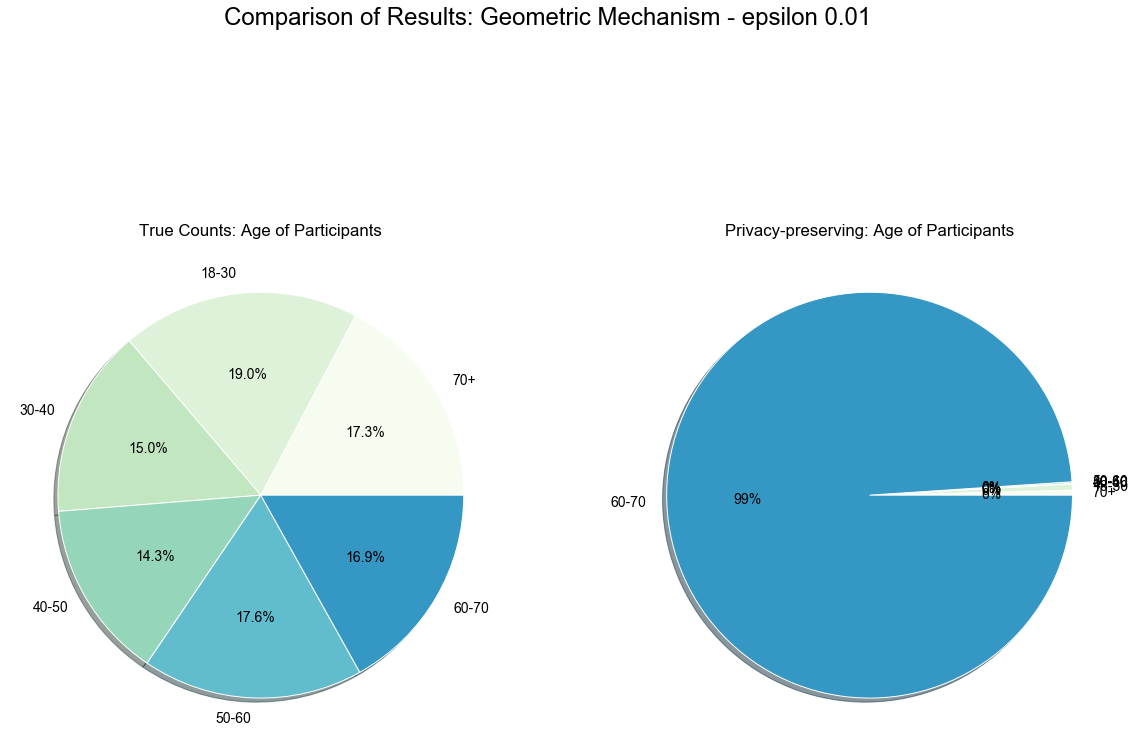

In [516]:

age_true = [9876, 10832, 8594, 8146, 10050,9652]
age_geo = age_histogram.value
#epsilon_ = 0.001
#epsilon_ = 0.001
age_labels = ['70+','18-30','30-40','40-50','50-60','60-70']
title = 'Comparison of Results: Geometric Mechanism - epsilon '+str(epsilon)
subtitle1 = 'True Counts: Age of Participants'
subtitle2 = 'Privacy-preserving: Age of Participants'
pie_comparison(age_labels, age_true, age_geo, title, subtitle1, subtitle2)

In [ ]:
[9876, 10832, 8594, 8146, 10050,9652]

In [382]:

epsilon_ = 0.4
with sn.Analysis() as analysis:
    data = sn.Dataset(path = data_kept_file, column_names = list(var_names))
    
    ## percentage of patients 
    ##that received treatment in each Age class
    
    filter_age5 =  sn.filter(data['HICOV'], mask = data['AGEP'] == '5')
    age5_histogram = sn.dp_histogram(
            sn.cast(filter_age5, 'bool', true_label="0"),
            upper = 9876,
            privacy_usage = {'epsilon': epsilon_}
        )
    filter_age4 =  sn.filter(data['HICOV'], mask = data['AGEP'] == '4')
    age4_histogram = sn.dp_histogram(
            sn.cast(filter_age4, 'bool', true_label="0"),
            upper = 10832,
            privacy_usage = {'epsilon': epsilon_}
        )
    filter_age3 =  sn.filter(data['HICOV'], mask = data['AGEP'] == '3')
    age3_histogram = sn.dp_histogram(
            sn.cast(filter_age3, 'bool', true_label="0"),
            upper = 8594,
            privacy_usage = {'epsilon': epsilon_}
        )
    filter_age2 =  sn.filter(data['HICOV'], mask = data['AGEP'] == '2')
    age2_histogram = sn.dp_histogram(
            sn.cast(filter_age2, 'bool', true_label="0"),
            upper = 8146,
            privacy_usage = {'epsilon': epsilon_}
        )
    filter_age1 =  sn.filter(data['HICOV'], mask = data['AGEP'] == '1')
    age1_histogram = sn.dp_histogram(
            sn.cast(filter_age1, 'bool', true_label="0"),
            upper = 10050,
            privacy_usage = {'epsilon': epsilon_}
        )
    filter_age0 =  sn.filter(data['HICOV'], mask = data['AGEP'] == '0')
    age0_histogram = sn.dp_histogram(
            sn.cast(filter_age0, 'bool', true_label="0"),
            upper = 9652,
            privacy_usage = {'epsilon': epsilon_}
        )
    
analysis.release()

In [383]:
df.groupby('age_group')['HICOV'].count()

age_group
70+          9876
[18, 30)    10832
[30, 40)     8594
[40, 50)     8146
[50, 60)    10050
[60, 70)     9652
Name: HICOV, dtype: int64

In [384]:
age0 = df[df.age_group == '[18, 30)'].HICOV.value_counts(sort=False)
age0

0      486
1    10346
Name: HICOV, dtype: int64

In [311]:
['70+','18-30','30-40','40-50','50-60', '60-70']

['70+', '18-30', '30-40', '40-50', '50-6060-70']

In [388]:
dpage0 = np.absolute(age0_histogram.value)
dpage1 = np.absolute(age1_histogram.value)
dpage2 = np.absolute(age2_histogram.value)
dpage3 = np.absolute(age3_histogram.value)
dpage4 = np.absolute(age4_histogram.value)
dpage5 = np.absolute(age5_histogram.value)

age0 = df[df.age_group == '70+'].HICOV.value_counts(sort=False)
age1 = df[df.age_group == '[18, 30)'].HICOV.value_counts(sort=False)
age2 = df[df.age_group == '[30, 40)'].HICOV.value_counts(sort=False)
age3 = df[df.age_group == '[40, 50)'].HICOV.value_counts(sort=False)
age4 = df[df.age_group == '[50, 60)'].HICOV.value_counts(sort=False)
age5 = df[df.age_group == '[60, 70)'].HICOV.value_counts(sort=False)

d1 = {'Group': ['70+','18-30','30-40','40-50','50-60' ,'60-70','70+','18-30','30-40','40-50','50-60' ,'60-70'],
     'Process':['true value', 'true value','true value','true value','true value','true value',\
      'privacy-preserving','privacy-preserving','privacy-preserving','privacy-preserving','privacy-preserving','privacy-preserving'],
     'Health Insurance Group':[ age0[1], age1[1], age2[1], age3[1], age4[1], age5[1],dpage0[1], dpage1[1], dpage2[1], dpage3[1], dpage4[1], dpage5[1]],
     'No Health Insurance Group':[ age0[0], age1[0], age2[0], age3[0], age4[0], age5[0],dpage0[0], dpage1[0], dpage2[0], dpage3[0], dpage4[0],dpage5[0]],
     'Variable': 'age_group'
     } 

age_df = pd.DataFrame(data=d1)


In [390]:
age_df

,Group,Process,Health Insurance Group,No Health Insurance Group,Variable
0,70+,true value,9855,21,age_group
1,18-30,true value,10346,486,age_group
2,30-40,true value,8227,367,age_group
3,40-50,true value,7903,243,age_group
4,50-60,true value,9777,273,age_group
5,60-70,true value,9531,121,age_group
6,70+,privacy-preserving,0,0,age_group
7,18-30,privacy-preserving,12,4,age_group
8,30-40,privacy-preserving,21,4,age_group
9,40-50,privacy-preserving,59,6,age_group


In [409]:
#dfs = [age_df, gender_df, country_df, remote_df, family_df]
#DF = pd.concat(dfs)
age_df['percentage'] = age_df['Health Insurance Group']*100/(age_df['No Health Insurance Group']+age_df['Health Insurance Group'])

In [410]:

age_df[age_df.Variable == 'age_group'].sort_values(['Group'])

,Group,Process,Health Insurance Group,No Health Insurance Group,Variable,percentage
1,18-30,true value,10346,486,age_group,95.513294
7,18-30,privacy-preserving,12,4,age_group,75.000000
2,30-40,true value,8227,367,age_group,95.729579
8,30-40,privacy-preserving,21,4,age_group,84.000000
3,40-50,true value,7903,243,age_group,97.016941
9,40-50,privacy-preserving,59,6,age_group,90.769231
4,50-60,true value,9777,273,age_group,97.283582
10,50-60,privacy-preserving,44,14,age_group,75.862069
5,60-70,true value,9531,121,age_group,98.746374
11,60-70,privacy-preserving,43,0,age_group,100.000000


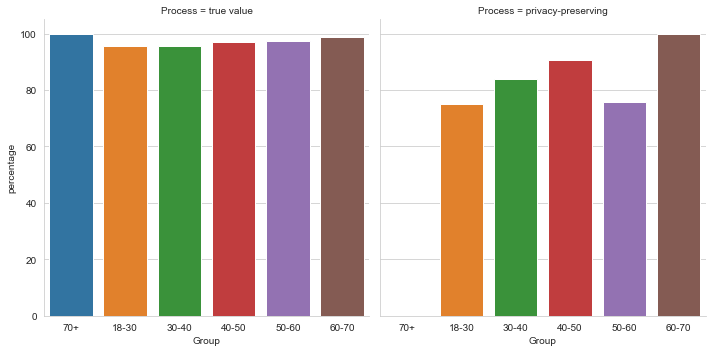

In [411]:

sns.catplot(x="Group", y="percentage", col="Process", data=age_df[age_df.Variable == 'age_group'], kind="bar")

#### Model Preprocessing

In [483]:
def cramers_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = sum(confusion_matrix.sum())
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [484]:
Coefs_var = ['age_group']

In [490]:

coefs = []
dpcoefs = []
for variable in Coefs_var:
    coefs.append(cramers_stat(age_df[(age_df.Variable == variable)&(age_df.Process == 'true value')][['Health Insurance Group', 'No Health Insurance Group']]))
    dpcoefs.append(cramers_stat(age_df[(age_df.Variable == variable)&(age_df.Process == 'privacy-preserving')][['Health Insurance Group', 'No Health Insurance Group']]))

ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

In [ ]:

c = {'True Coef': coefs,
        'Privacy Coef':dpcoefs}
cramer_coef = pd.DataFrame(data=c, index = Coefs_var)

In [ ]:
cramer_coef

In [30]:
y = df['HICOV']
all_x_features=df.drop(['HICOV','AGE GROUP','CITIZEN GROUP','COW GROUP','SEX GROUP'], axis=1)

In [31]:
all_x_features.head()

,PUMA,PWGTP,AGEP,CIT,LANX,SCHL,SEX,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,GCL,COW,MAR,ESR,MIG,DIS,RAC1P
29,3301,10,60,1,2.0,16.0,1,2.0,2,2,2.0,2.0,2.0,2.0,1.0,5,6.0,3.0,2,1
31,3603,17,30,3,2.0,19.0,1,2.0,2,2,2.0,2.0,2.0,2.0,1.0,5,1.0,1.0,2,1
38,1900,14,47,2,1.0,23.0,1,2.0,2,2,2.0,2.0,2.0,2.0,1.0,5,1.0,1.0,2,1
54,506,7,42,1,2.0,21.0,1,2.0,2,2,2.0,2.0,2.0,2.0,1.0,5,1.0,1.0,2,1
64,3304,53,35,1,2.0,19.0,1,2.0,2,1,1.0,1.0,1.0,2.0,1.0,5,6.0,1.0,1,2


In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(all_x_features)
X_std_scale = pd.DataFrame(scaler.transform(all_x_features), columns=all_x_features.columns)


transformer = PCA().fit(X_std_scale)
X_pca = transformer.transform(X_std_scale)
print(X_pca.shape)


print(sum(transformer.explained_variance_ratio_[0:2]))
np.where(np.cumsum(transformer.explained_variance_ratio_) > 0.9)[0][0] + 1

pca_features=transformer.explained_variance_ratio_
feature_importance_df = pd.DataFrame(list(zip(pca_features, all_x_features)))
feature_importance_df.columns = ['feature.importance', 'feature']
feature_importance_df.sort_values(by='feature.importance', ascending=False)



(34254, 20)
0.2648004842343724


,feature.importance,feature
0,0.150468,PUMA
1,0.114333,PWGTP
2,0.073643,AGEP
3,0.058977,CIT
4,0.056236,LANX
5,0.051773,SCHL
6,0.050546,SEX
7,0.049979,DDRS
8,0.047322,DEAR
9,0.046974,DEYE


In [33]:

x_train, x_test, y_train, y_test = train_test_split(all_x_features, y, test_size=0.3)

In [34]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(23977, 20)

(10277, 20)

(23977,)

(10277,)

### Logistic Regression without Data Privacy

In [35]:
HI_log = LogisticRegression(max_iter = 500)
HI_log.fit(x_train, y_train)
y_pred = HI_log.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

roc_score = metrics.roc_auc_score(y_test, y_pred)
acc_score = metrics.accuracy_score(y_test, y_pred)

print('ROC AUC Score: %f' %roc_score)
print('Accuracy Score: %f' %acc_score)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       275
           1       0.97      1.00      0.99     10002

    accuracy                           0.97     10277
   macro avg       0.49      0.50      0.49     10277
weighted avg       0.95      0.97      0.96     10277

ROC AUC Score: 0.499900
Accuracy Score: 0.973047


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Logistic Regression with Data Privacy


In [36]:
from diffprivlib.models import GaussianNB, LogisticRegression
HI_log = LogisticRegression(epsilon = 3.0, data_norm=7.89)

HI_log.fit(x_train, y_train)
y_pred = HI_log.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

roc_score = metrics.roc_auc_score(y_test, y_pred)
acc_score = metrics.accuracy_score(y_test, y_pred)
print('ROC AUC Score: %f' %roc_score)
print('Accuracy Score: %f' %acc_score)

              precision    recall  f1-score   support

           0       0.03      1.00      0.05       275
           1       0.00      0.00      0.00     10002

    accuracy                           0.03     10277
   macro avg       0.01      0.50      0.03     10277
weighted avg       0.00      0.03      0.00     10277

ROC AUC Score: 0.500000
Accuracy Score: 0.026759


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


General Observation: As we can see from above the ROC score above the model performance was not impacted with the inclusion of smart noise. However our ROC shows that our model is no better than a coin toss so further analysis is required. 

### Exploration With SmartNoise - Histograms



In [37]:
df['age_group'] = df['AGEP'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [39]:
data_kept_file= 'df.csv'
df.to_csv(data_kept_file)

In [40]:

def dp_histo(epsilon = 0.01, delta=.000001):
    
   
    var_names=df.columns
    with sn.Analysis(protect_floating_point=False) as analysis:
        data = sn.Dataset(path=data_kept_file, column_names=list(var_names))
        #nsize = sample_size    

        age_histogram = sn.dp_histogram(data["age_group"],categories=age_cat, null_value="-1", privacy_usage={'epsilon':epsilon})
        #print(data.columns)
        income_prep = sn.histogram(data['age_group'],
                categories = age_cat, null_value = "-1")
        income_histogram2 = sn.laplace_mechanism(income_prep, privacy_usage={"epsilon": epsilon, "delta": delta})

    analysis.release()
    
    return age_histogram.value, income_histogram2.value

def perc_error(true_col, dp_col):
    return sum(abs(true_col - dp_col)) / sum(true_col) * 100

In [41]:
geo_counts, laplace_counts = dp_histo(epsilon=0.001, delta=.0000001) 

print("Income histogram Geometric DP release:   " + str(geo_counts))
print("Income histogram Laplace DP release:     " + str(laplace_counts.astype(int)))

Income histogram Geometric DP release:   [  299     0  2214     0     0     0 32837]
Income histogram Laplace DP release:     [-3086   791 -4199  1448   106  5425 34129]


In [42]:
results = pd.DataFrame()
private_df = pd.read_csv(data_kept_file)
results['True'] = private_df['age_group'].value_counts()
results['Geom-DP'] = geo_counts[1:len(age_cat)]
results['Lapl-DP'] = laplace_counts[1:len(age_cat)].astype(int)
results

,True,Geom-DP,Lapl-DP
"[50, 60)",8841,0,791
"[30, 40)",8063,2214,-4199
"[40, 50)",7423,0,1448
"[60, 70)",7186,0,106
70+,2741,0,5425


General Observations: Although we were ultimately unsuccessful at producing the SmartNoise Histograms for this EDA we thought it would be important to share our attempt. We are confident that we will be able to reduce a working output for our final analysis. 

##### End of Document.

In [43]:
#No privacy with blind people who live in a certain zipcode. Summarize zip code of dead people

In [44]:
df.head()

,PUMA,PWGTP,AGEP,AGE GROUP,CIT,CITIZEN GROUP,LANX,SCHL,SEX,SEX GROUP,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,GCL,COW,COW GROUP,MAR,ESR,MIG,DIS,RAC1P,HICOV,age_group
29,3301,10,60,OldAdult,1,Born U.S.,2.0,16.0,1,Male,2.0,2,2,2.0,2.0,2.0,2.0,1.0,Employeed/Paid,5,6.0,3.0,2,1,1,"[60, 70)"
31,3603,17,30,YoungAdult,3,Born Abroad of American Parents,2.0,19.0,1,Male,2.0,2,2,2.0,2.0,2.0,2.0,1.0,Employeed/Paid,5,1.0,1.0,2,1,1,"[30, 40)"
38,1900,14,47,Adult,2,Born Puerto Rico,1.0,23.0,1,Male,2.0,2,2,2.0,2.0,2.0,2.0,1.0,Employeed/Paid,5,1.0,1.0,2,1,1,"[40, 50)"
54,506,7,42,Adult,1,Born U.S.,2.0,21.0,1,Male,2.0,2,2,2.0,2.0,2.0,2.0,1.0,Employeed/Paid,5,1.0,1.0,2,1,1,"[40, 50)"
64,3304,53,35,Adult,1,Born U.S.,2.0,19.0,1,Male,2.0,2,1,1.0,1.0,1.0,2.0,1.0,Employeed/Paid,5,6.0,1.0,1,2,0,"[30, 40)"


In [83]:
vision_impared

,PUMA,PWGTP,AGEP,AGE GROUP,CIT,CITIZEN GROUP,LANX,SCHL,SEX,SEX GROUP,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,GCL,COW,COW GROUP,MAR,ESR,MIG,DIS,RAC1P,HICOV,age_group
64,3304,53,35,Adult,1,Born U.S.,2.0,19.0,1,Male,2.0,2,1,1.0,1.0,1.0,2.0,1.0,Employeed/Paid,5,6.0,1.0,1,2,0,"[30, 40)"
9903,3601,105,33,YoungAdult,1,Born U.S.,2.0,21.0,2,Female,2.0,2,1,2.0,2.0,2.0,2.0,1.0,Employeed/Paid,1,1.0,1.0,1,6,0,"[30, 40)"
11476,3301,73,32,YoungAdult,4,U.S. Citizen by Naturalization,2.0,22.0,1,Male,2.0,2,1,2.0,2.0,2.0,2.0,2.0,Employeed/Paid,5,1.0,1.0,1,6,0,"[30, 40)"
20472,304,44,40,Adult,5,Not U.S. Citizen,1.0,21.0,2,Female,2.0,2,1,2.0,2.0,2.0,2.0,1.0,Employeed/Paid,1,3.0,1.0,1,1,0,"[40, 50)"
23481,100,94,46,Adult,1,Born U.S.,2.0,16.0,1,Male,2.0,2,1,2.0,2.0,2.0,2.0,1.0,Employeed/Paid,5,3.0,1.0,1,1,0,"[40, 50)"
35221,3400,62,53,OldAdult,4,U.S. Citizen by Naturalization,1.0,16.0,2,Female,2.0,2,1,2.0,2.0,2.0,2.0,4.0,Employeed/Paid,1,1.0,1.0,1,1,0,"[50, 60)"
41018,3304,39,89,Elderly,1,Born U.S.,2.0,1.0,2,Female,1.0,2,1,1.0,1.0,1.0,2.0,2.0,Employeed/Paid,4,6.0,1.0,1,2,0,70+
43877,1902,107,46,Adult,2,Born Puerto Rico,1.0,17.0,2,Female,2.0,2,1,2.0,2.0,2.0,2.0,3.0,Employeed/Paid,5,1.0,1.0,1,1,0,"[40, 50)"
45764,3305,64,33,YoungAdult,1,Born U.S.,2.0,19.0,1,Male,2.0,1,1,1.0,1.0,1.0,2.0,1.0,Employeed/Paid,5,1.0,1.0,1,1,0,"[30, 40)"
52696,3303,48,72,Elderly,3,Born Abroad of American Parents,2.0,22.0,1,Male,2.0,2,1,2.0,2.0,1.0,2.0,3.0,Employeed/Paid,5,6.0,1.0,1,1,0,70+


In [78]:

# data.rename({'Col x': 'Col X'}, axis=1, inplace=True, errors="raise")

In [79]:
default_by_conversion_df

HICOV,No Health Insurance,Health Coverage
PUMA,,
100,1.0,5.0
200,NaN,9.0
300,NaN,12.0
301,NaN,2.0
302,NaN,6.0
303,NaN,10.0
304,1.0,12.0
400,NaN,15.0
501,NaN,4.0


In [ ]:
#The privacy of the one person who lives in 3602 has been compromised, because now i know the person, has no health insurance

In [ ]:
#Break this down, by how many blind people by zip code have health insurance vs dont

So a differential privacy mechanism What it does is it adds noise to a query result in order to mask the presence or absence of an individual in the data set so in a scenario where we have differential privacy it researcher will query the data base and will get as a result, the.

In [115]:
df.groupby('age_group')['HICOV'].count()

age_group
70+         2741
[30, 40)    8063
[40, 50)    7423
[50, 60)    8841
[60, 70)    7186
Name: HICOV, dtype: int64

In [ ]:
var_names=df.columns
    with sn.Analysis(protect_floating_point=False) as analysis:
        data = sn.Dataset(path=data_kept_file, column_names=list(var_names))
        #nsize = sample_size    

        age_histogram = sn.dp_histogram(data["age_group"],categories=age_cat, null_value="-1", privacy_usage={'epsilon':epsilon})
        #print(data.columns)

he hard part is is to calculate the sensitivity of these functions and understand the impact of individuals, so we can add noise, this is a very hot area of research